<a href="https://colab.research.google.com/github/irtengunica/yapayzekadosya/blob/master/Hafta3Kod2HayvanatBah%C3%A7esiAra%C3%A7Sat%C4%B1%C5%9F%C4%B1%C3%B6rne%C4%9Fi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

hayvanat bahçesindeki verilen bilgilere göre hayvanın cinsini
tahminleyen Bayes öğrenme modeli kurunuz.

https://archive.ics.uci.edu/dataset/ depolarının olduğu kütüphaneyi bilgisayara yükle

In [11]:
!pip install ucimlrepo

Zoo hazır veri setini indirme ve veri seti kontrolü

(https://archive.ics.uci.edu/ml/datasets/zoo) Türkçe’ye dönüştürülmüş hali:

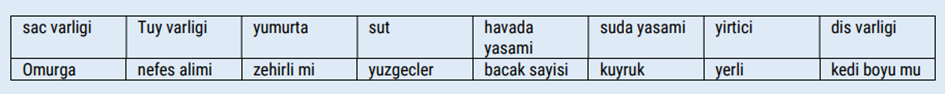

“sınıf” parametresindeki hayvan türlerine ait sınıfları:

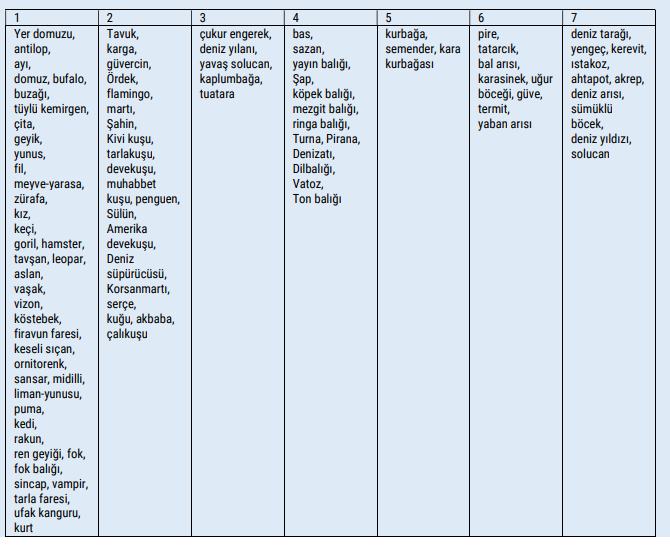


In [16]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
zoo = fetch_ucirepo(id=111)

# data (as pandas dataframes)
X = zoo.data.features
y = zoo.data.targets

# metadata
print(zoo.metadata)
#print(X)
#print(y)
# variable information
print(zoo.variables)

{'uci_id': 111, 'name': 'Zoo', 'repository_url': 'https://archive.ics.uci.edu/dataset/111/zoo', 'data_url': 'https://archive.ics.uci.edu/static/public/111/data.csv', 'abstract': 'Artificial, 7 classes of animals', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 101, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['type'], 'index_col': ['animal_name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Sep 15 2023', 'dataset_doi': '10.24432/C5R59V', 'creators': ['Richard Forsyth'], 'intro_paper': None, 'additional_info': {'summary': 'A simple database containing 17 Boolean-valued attributes.  The "type" attribute appears to be the class attribute.  Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)', 'purpose': None, 'funded_by': None, 'inst

Doğruluk: 0.8888888888888888


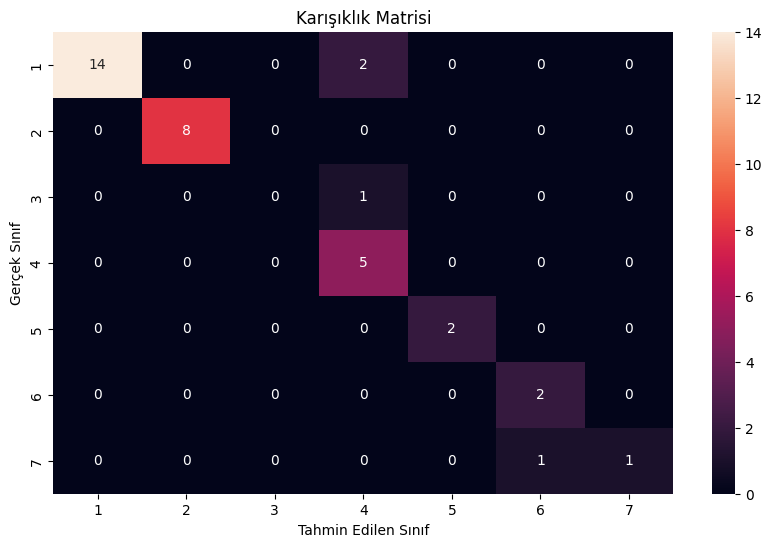

In [49]:
# Gerekli kütüphaneleri içe aktarın
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# UC Irvine Machine Learning Repository'den "Zoo" veri setini yükleyin
zoo = fetch_ucirepo(id=111)

# Özellikler ve hedefleri alın
girisler = zoo.data.features
cikis = zoo.data.targets

# Veri setini eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(girisler, cikis, test_size=0.35, random_state=109)

# Categorical Naive Bayes modelini oluşturun
gnb = CategoricalNB()

# Modeli eğitin
y_train = np.ravel(y_train) # y hedef değişkenini tek boyutlu bir diziye dönüştürür.y hedef değişkeni bir sütun vektörü olarak beklenir
gnb.fit(X_train, y_train)

# Test veri setinde tahmin yapın
y_pred = gnb.predict(X_test)

# Karışıklık matrisini hesaplayın
cm = confusion_matrix(y_test, y_pred)

# Sınıf etiketlerini oluşturun
index = ['1','2','3','4','5','6','7']
columns = ['1','2','3','4','5','6','7']
cm_df = pd.DataFrame(cm, columns=index, index=columns)

# Karışıklık matrisini görselleştirin
plt.figure(figsize=(10,6))
sns.heatmap(cm_df, annot=True, fmt="d")
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karışıklık Matrisi')

# Doğruluk ölçümünü hesaplayın ve yazdırın
from sklearn import metrics
print("Doğruluk:", metrics.accuracy_score(y_test, y_pred))

# Görselleştirmeyi gösterin
plt.show()

In [18]:
pwd

'/content/zoo'

In [2]:
mkdir zoo

In [3]:
ls

sample_data/  zoo/


In [4]:
cd zoo

/content/zoo


In [5]:
pwd

'/content/zoo'

In [6]:
from google.colab import files
uploaded = files.upload()

Saving hayvanatbahcesi.csv to hayvanatbahcesi.csv
Saving hayvanatbahcesi1.csv to hayvanatbahcesi1.csv


In [ ]:
!rm hay*

In [19]:
ls

hayvanatbahcesi1.csv  hayvanatbahcesi.csv


yüklediğimiz veriseti kontrolü: (not burdaki hayvan isimlerini sayılaştırmamız gerekiyor)

In [21]:
import numpy as np
import pandas as pd
veri =pd.read_csv("hayvanatbahcesi1.csv",encoding='unicode_escape')

from sklearn import preprocessing
sayisallastirma = preprocessing.LabelEncoder()
#hayvan isimlerini sayısalllaştırma
veri["hayvan adi"]=sayisallastirma.fit_transform(veri["hayvan adi"])

girisler=np.array(veri.drop(["sinifi"],axis=1))
cikis=np.array(veri["sinifi"])
print(veri)

     hayvan adi  sac varligi  Tuy varligi  yumurta  sut  havada yasami  \
0            93            1            0        0    1              0   
1            14            1            0        0    1              0   
2            18            0            0        1    0              0   
3            16            1            0        0    1              0   
4            25            1            0        0    1              0   
..          ...          ...          ...      ...  ...            ...   
96           86            1            0        0    1              0   
97           91            1            0        1    0              1   
98            4            1            0        0    1              0   
99           75            0            0        1    0              0   
100          96            0            1        1    0              1   

     suda yasami  yiritici  dis varligi  omurga  nefes alimi  zihirli mi  \
0              0         1         

Doğruluk: 0.9444444444444444


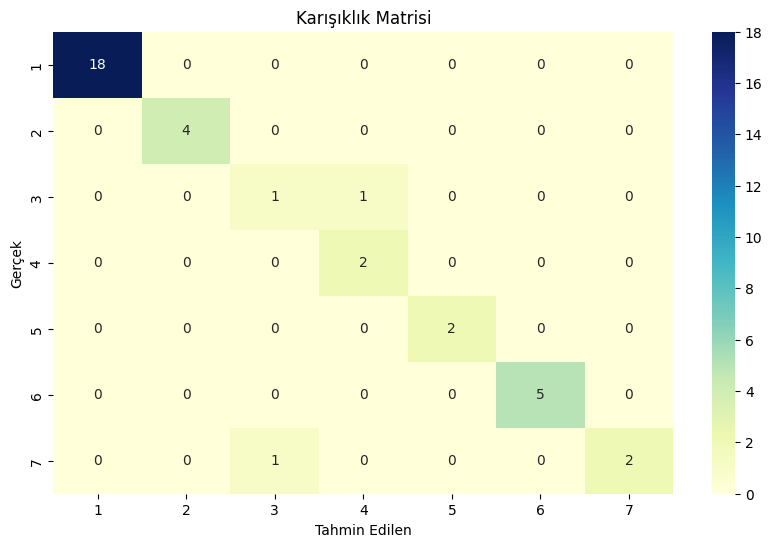

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Verileri yükleyin
veri = pd.read_csv("hayvanatbahcesi1.csv", encoding='unicode_escape')

# hayvan adi sutununu sayısalllaştırma işlemi
sayisallastirma =LabelEncoder()
veri["hayvan adi"]=sayisallastirma.fit_transform(veri["hayvan adi"])

# Özellikler ve hedef değişkeni ayırın
X = veri.drop("sinifi", axis=1)
y = veri["sinifi"]

# Kategorik sınıf adını sayısal değerlere dönüştürün
le = LabelEncoder()
y = le.fit_transform(y)

# Eğitim ve test verilerini ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Categorical Naive Bayes modelini oluşturun ve eğitin
gnb = CategoricalNB()
gnb.fit(X_train, y_train)

# Tahmin yapın
y_pred = gnb.predict(X_test)

# Doğruluk ve karışıklık matrisini hesaplayın
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştirin
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')

# Sonuçları yazdırın
print("Doğruluk:", accuracy)
plt.show()

Bayes öğrenme ile araç satış değerlendirme problemi çözümü:

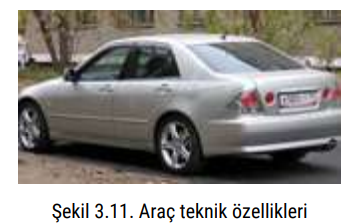



Bayes öğrenme ile araç satış için giriş çıkış parametresini belirler.

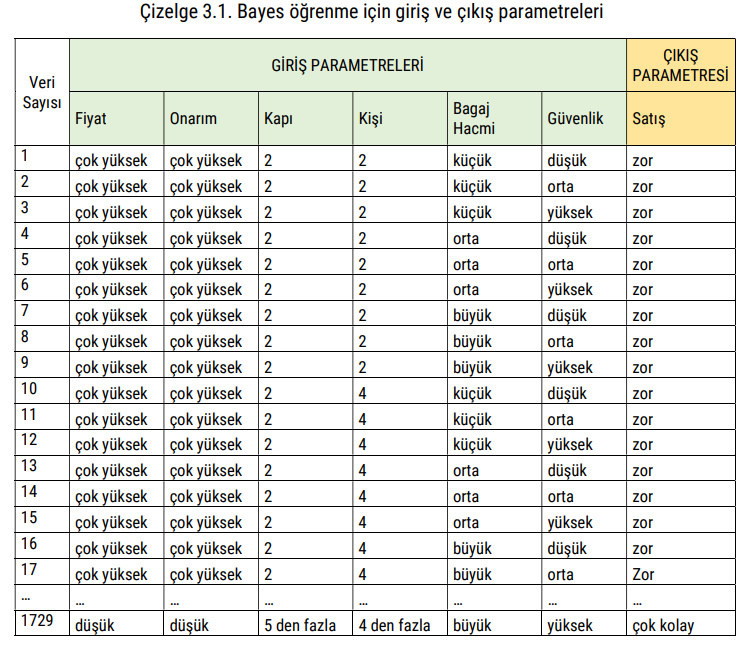


https://github.com/deneyapyz/ortaokul/Hafta3/car.csv adresinde bulunan veristidosyasında araçlara ait 1729 adet veri setinde (Dua, D. and Graff, C., 2019) fiyat, onarım, kapı, kişi sayısı, bagaj hacmi ve güvenlik giriş parametrelerine göre aracın satış durumunun makine öğrenmesi ile tahminlenmesi amaçlanmıştır. Önce veri seti dosyasını colapsa upload edelim.

In [24]:
from google.colab import files
uploaded = files.upload()

Saving car.csv to car.csv


Dosyadaki verileri inceleyip sayısallaştıralım.

In [25]:
!ls

car.csv  hayvanatbahcesi1.csv  hayvanatbahcesi.csv


In [37]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükleyin
veri = pd.read_csv("car.csv", encoding='unicode_escape')
veri_copy = veri.copy()
print(veri)
print(len(veri))

           fiyat      onarim  kapi sayisi  kisi sayisi bagaj boyutu Guvenlik  \
0     çok yüksek  çok yüksek            2            2        küçük    düþük   
1     çok yüksek  çok yüksek            2            2        küçük     orta   
2     çok yüksek  çok yüksek            2            2        küçük   yüksek   
3     çok yüksek  çok yüksek            2            2         orta    düþük   
4     çok yüksek  çok yüksek            2            2         orta     orta   
...          ...         ...          ...          ...          ...      ...   
1723       düþük       düþük  5 den fazla  4 den fazla         orta     orta   
1724       düþük       düþük  5 den fazla  4 den fazla         orta   yüksek   
1725       düþük       düþük  5 den fazla  4 den fazla        büyük    düþük   
1726       düþük       düþük  5 den fazla  4 den fazla        büyük     orta   
1727       düþük       düþük  5 den fazla  4 den fazla        büyük   yüksek   

         satis   
0           zor  
1  

In [39]:
# Sütun adlarındaki boşlukları kaldırın
veri_copy.columns = veri_copy.columns.str.strip()
print(veri_copy)
print(len(veri_copy))

           fiyat      onarim  kapi sayisi  kisi sayisi bagaj boyutu Guvenlik  \
0     çok yüksek  çok yüksek            2            2        küçük    düþük   
1     çok yüksek  çok yüksek            2            2        küçük     orta   
2     çok yüksek  çok yüksek            2            2        küçük   yüksek   
3     çok yüksek  çok yüksek            2            2         orta    düþük   
4     çok yüksek  çok yüksek            2            2         orta     orta   
...          ...         ...          ...          ...          ...      ...   
1723       düþük       düþük  5 den fazla  4 den fazla         orta     orta   
1724       düþük       düþük  5 den fazla  4 den fazla         orta   yüksek   
1725       düþük       düþük  5 den fazla  4 den fazla        büyük    düþük   
1726       düþük       düþük  5 den fazla  4 den fazla        büyük     orta   
1727       düþük       düþük  5 den fazla  4 den fazla        büyük   yüksek   

          satis  
0           zor  
1  

In [58]:
# LabelEncoder'ı oluşturun
sayisallastirma = preprocessing.LabelEncoder()

# Sınıf etiketlerini sayısal hale getirin
veri_copy["fiyat"] = sayisallastirma.fit_transform(veri_copy["fiyat"])
veri_copy["onarim"] = sayisallastirma.fit_transform(veri_copy["onarim"])
veri_copy["kapi sayisi"] = sayisallastirma.fit_transform(veri_copy["kapi sayisi"])
veri_copy["kisi sayisi"] = sayisallastirma.fit_transform(veri_copy["kisi sayisi"])
veri_copy["bagaj boyutu"] = sayisallastirma.fit_transform(veri_copy["bagaj boyutu"])
veri_copy["Guvenlik"] = sayisallastirma.fit_transform(veri_copy["Guvenlik"])
veri_copy["satis"] = sayisallastirma.fit_transform(veri_copy["satis"])
print(veri_copy["onarim"])
print(veri_copy)
print(len(veri_copy))

0       3
1       3
2       3
3       3
4       3
       ..
1723    0
1724    0
1725    0
1726    0
1727    0
Name: onarim, Length: 1728, dtype: int64
      fiyat  onarim  kapi sayisi  kisi sayisi  bagaj boyutu  Guvenlik  satis
0         3       3            0            0             1         0      2
1         3       3            0            0             1         1      2
2         3       3            0            0             1         2      2
3         3       3            0            0             2         0      2
4         3       3            0            0             2         1      2
...     ...     ...          ...          ...           ...       ...    ...
1723      0       0            3            2             2         1      0
1724      0       0            3            2             2         2      3
1725      0       0            3            2             0         0      2
1726      0       0            3            2             0         1      0
17

In [42]:
# Giriş ve çıkış verilerini ayarlayın
girisler = np.array(veri_copy.drop(["satis"], axis=1))
cikis = np.array(veri_copy["satis"])
print(girisler)
print(cikis)
print(len(girisler))
print(len(cikis))

[[3 3 0 0 1 0]
 [3 3 0 0 1 1]
 [3 3 0 0 1 2]
 ...
 [0 0 3 2 0 0]
 [0 0 3 2 0 1]
 [0 0 3 2 0 2]]
[2 2 2 ... 2 0 3]
1728
1728


Modelin Doğruluğu: 0.859344894026975


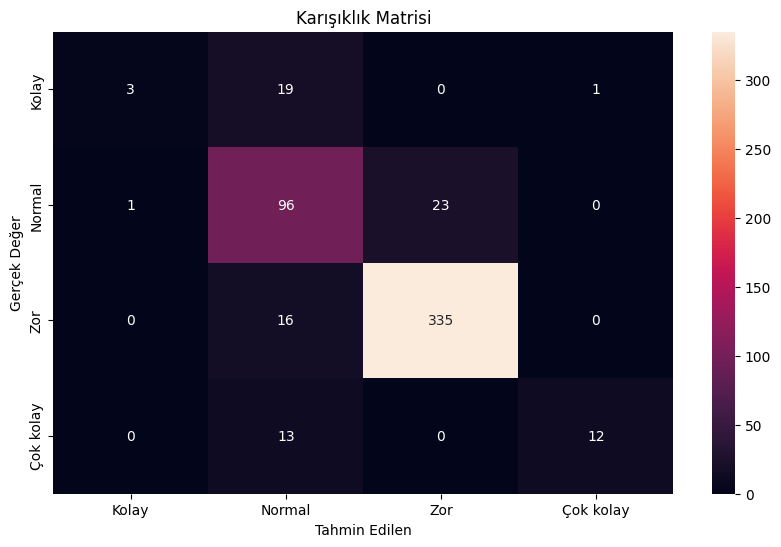

In [56]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükleyin
veri = pd.read_csv("car.csv", encoding='unicode_escape')
veri_copy = veri.copy()

# Sütun adlarındaki boşlukları kaldırın
veri_copy.columns = veri_copy.columns.str.strip()

# LabelEncoder'ı oluşturun
sayisallastirma = preprocessing.LabelEncoder()

# Sınıf etiketlerini sayısal hale getirin
veri_copy["fiyat"] = sayisallastirma.fit_transform(veri_copy["fiyat"])
veri_copy["onarim"] = sayisallastirma.fit_transform(veri_copy["onarim"])
veri_copy["kapi sayisi"] = sayisallastirma.fit_transform(veri_copy["kapi sayisi"])
veri_copy["kisi sayisi"] = sayisallastirma.fit_transform(veri_copy["kisi sayisi"])
veri_copy["bagaj boyutu"] = sayisallastirma.fit_transform(veri_copy["bagaj boyutu"])
veri_copy["Guvenlik"] = sayisallastirma.fit_transform(veri_copy["Guvenlik"])
veri_copy["satis"] = sayisallastirma.fit_transform(veri_copy["satis"])

# Giriş ve çıkış verilerini ayarlayın
girisler = np.array(veri_copy.drop(["satis"], axis=1))
cikis = np.array(veri_copy["satis"])

# Eğitim ve test verilerini ayırın
giris_egitim, giris_test, satis_egitim, satis_test = train_test_split(girisler, cikis, test_size=0.3, random_state=109)

# Categorical Naive Bayes modelini oluşturun ve eğitin
model = CategoricalNB()
model.fit(giris_egitim, satis_egitim)

# Tahmin yapın
satis_tahmin = model.predict(giris_test)

# Doğruluk ve karışıklık matrisini hesaplayın
dogruluk = accuracy_score(satis_test, satis_tahmin)
cm = confusion_matrix(satis_test, satis_tahmin)

# Karışıklık matrisini görselleştirin
index = ['Kolay', 'Normal', 'Zor', 'Çok kolay']
columns = ['Kolay', 'Normal', 'Zor', 'Çok kolay']
cm_df = pd.DataFrame(cm, columns, index)
plt.figure(figsize=(10, 6))
sns.heatmap(cm_df, annot=True, fmt="d")
plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')

# Sonuçları yazdırın
print("Modelin Doğruluğu:", dogruluk)
plt.show()